In [1]:
#selection
#Select necessary libraries
import pandas as pd
import string
import collections
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [5]:
#select data source
populationdata=pd.read_csv("D:\Data visualization\emailsdata.csv",encoding= 'unicode_escape')

In [6]:
populationdata.head()

,email_type,description
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,U have a Secret Admirer who is looking 2 make ...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#output  the shape of the data container(frame)
print("The shape of the dataframe is :/",populationdata.shape)

The shape of the dataframe is :/ (42, 2)


In [8]:
#Select data sample
#select a sample with a certain number of records
sampledata=populationdata.sample(40)
print("Data Sample/n",sampledata)

Data Sample/n    email_type                                        description
32        ham                    I'll text you when I drop x off
37        NaN                                                NaN
38        NaN                                                NaN
29       spam  Hello. We need some posh birds and chaps to us...
13       spam  URGENT! You have won a 1 week FREE membership ...
20        ham                 I dont knw pa, i just drink milk..
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
22        ham  Omg I want to scream. I weighed myself and I l...
25        ham      Dude ive been seeing a lotta corvettes lately
21        ham  Maybe?! Say hi to  and find out if  got his ca...
26       spam  Congratulations ur awarded either a yrs supply...
41        ham                        Dude we should go sup again
23       spam  Shop till u Drop, IS IT YOU, either 10K, 5K, ...
27        h

In [9]:
#select sample data with certain cases
#e,g select only spam emails
spam_emails=sampledata[sampledata.email_type=='spam']
#output the shape
print('Data shape/n',spam_emails.shape)

Data shape/n (16, 2)


In [10]:
#output sample data with spam emails
print('Data Sample/n',spam_emails)

Data Sample/n    email_type                                        description
29       spam  Hello. We need some posh birds and chaps to us...
13       spam  URGENT! You have won a 1 week FREE membership ...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
26       spam  Congratulations ur awarded either a yrs supply...
23       spam  Shop till u Drop, IS IT YOU, either 10K, 5K, ...
12       spam  SIX chances to win CASH! From 100 to 20,000 po...
36       spam  Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
19       spam                                                NaN
16       spam  XXXMobileMovieClub: To use your credit, click ...
28       spam  PRIVATE! Your 2003 Account Statement for 07808...
9        spam  Had your mobile 11 months or more? U R entitle...
8        spam  WINNER!! As a valued network customer you have...
24       spam  Reminder: You have not downloaded the content ...
11       sp

Pre-processing Step1: Selection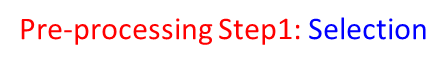

In [11]:
#clean the sample data
#check the sum of missing values
#checking for records with missing(null) values in description
spam_emails['description'].isnull().sum()
#Drop all records will missing values
cleaned_spam_emails=spam_emails.dropna()
print(cleaned_spam_emails)

   email_type                                        description
29       spam  Hello. We need some posh birds and chaps to us...
13       spam  URGENT! You have won a 1 week FREE membership ...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
5        spam  FreeMsg Hey there darling it's been 3 week's n...
26       spam  Congratulations ur awarded either a yrs supply...
23       spam  Shop till u Drop, IS IT YOU, either 10K, 5K, ...
12       spam  SIX chances to win CASH! From 100 to 20,000 po...
36       spam  Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
16       spam  XXXMobileMovieClub: To use your credit, click ...
28       spam  PRIVATE! Your 2003 Account Statement for 07808...
9        spam  Had your mobile 11 months or more? U R entitle...
8        spam  WINNER!! As a valued network customer you have...
24       spam  Reminder: You have not downloaded the content ...
3        spam  U have a Secret Admirer who is looking 2 make ...


Pre-processing Step3: Data transformation

In [12]:
#data transformation
#create an array to store transformed data
transformed_spam=[]
#convert cleaned sample data to lower case
cleaned_spam_inlowercase=cleaned_spam_emails['description'].str.lower()
print('Separate words of spam Description/n/n',cleaned_spam_inlowercase)
#spliiting the text to separate words
split_spam=cleaned_spam_inlowercase.str.split('')
print('Separate words of spam description/n',split_spam)
#remove punctuations
for text in split_spam:
    text=[x.strip(string.punctuation) for x in text]
    transformed_spam.append(text)
    
    
 #output transformed data
print(transformed_spam)

Separate words of spam Description/n/n 29    hello. we need some posh birds and chaps to us...
13    urgent! you have won a 1 week free membership ...
2     free entry in 2 a wkly comp to win fa cup fina...
5     freemsg hey there darling it's been 3 week's n...
26    congratulations ur awarded either a yrs supply...
23    shop till u drop, is it you, either 10k, 5k, ...
12    six chances to win cash! from 100 to 20,000 po...
36    sunshine quiz wkly q! win a top sony dvd playe...
16    xxxmobilemovieclub: to use your credit, click ...
28    private! your 2003 account statement for 07808...
9     had your mobile 11 months or more? u r entitle...
8     winner!! as a valued network customer you have...
24    reminder: you have not downloaded the content ...
3     u have a secret admirer who is looking 2 make ...
Name: description, dtype: object
Separate words of spam description/n 29    [, h, e, l, l, o, .,  , w, e,  , n, e, e, d,  ...
13    [, u, r, g, e, n, t, !,  , y, o, u,  , h, a, 

# Pre-processing Step4: Data Integration!

In [13]:
#integrate sample data to create text corpus
text_corpus=[''.join(text) for text in transformed_spam]
final_text_corpus=''.join(text_corpus)
print(final_text_corpus)

hello we need some posh birds and chaps to user trial prods for champneys can i put you down i need your address and dob asap ta rurgent you have won a 1 week free membership in our 100000 prize jackpot txt the word claim to no 81010 tc wwwdbuknet lccltd pobox 4403ldnw1a7rw18free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18sfreemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send 150 to rcvcongratulations ur awarded either a yrs supply of cds from virgin records or a mystery gift guaranteed call 09061104283 tscs wwwsmsconet 150pm approx 3minsshop till u drop is it you either 10k 5k 500 cash or 100 travel voucher call now 09064011000 ntt po box cr01327bt fixedline cost 150ppm mobile varysix chances to win cash from 100 to 20000 pounds txt csh11 and send to 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 i

# build the word cloud from text corpus !

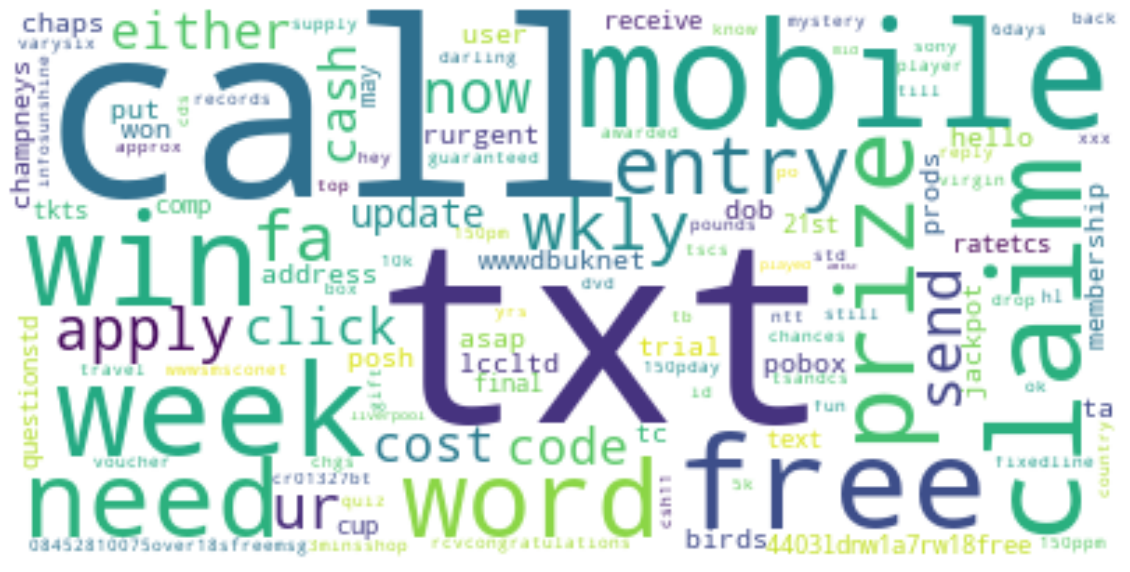

In [15]:
#build word cloud model from the text scorpus
#Build word cloud from text corpus
wordcloud_spam=WordCloud(background_color='white').generate(final_text_corpus)
#plot word cloud model
plt.figure(figsize=(20,20))
plt.imshow(wordcloud_spam,interpolation='bilinear')
plt.axis('off')
plt.show()